# IMDB Sentimental Analysis 

## Step 1: Loading the dataset

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')


df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [2]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = (['The sun is shining',
         'The weather is sweet',
         'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


# Step 2: Cleaning the data

In [6]:
import re
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("Testing..")

'testing '

In [7]:
# preprocess data
df['review'] = df['review'].apply(preprocessor)

# Task 3: Tokenization
___

In [8]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tokenizer('runners like running thus they run')

['runners', 'like', 'running', 'thus', 'they', 'run']

In [9]:
tokenizer_stemmer('runners like running thus they run')

['runner', 'like', 'run', 'thu', 'they', 'run']

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_stemmer('runners like running thus they run') if w not in stop]

['runner', 'like', 'run', 'thu', 'run']

# Task 4: Transform Text Data into TF-IDF Vectors and Labeling the Sentiment Text
___

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Step 2
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

lb = LabelBinarizer() #labeling the sentient data
y = lb.fit_transform(df.sentiment) #transformed sentiment data
X = tfidf.fit_transform(df.review) #transformed reviews

# Task 5: Splitting the Data into Test and Train

In [13]:
tv_train_reviews = X[:25000]
tv_test_reviews = X[25000:]

train_sentiments = y[:25000]
test_sentiments = y[25000:]

print('tv_train_reviews:',tv_train_reviews.shape)
print('tv_test_reviews:',tv_test_reviews.shape)


print('train_sentiments:',train_sentiments.shape)
print('test_sentiments:',test_sentiments.shape)

print(train_sentiments)
print(test_sentiments)

tv_train_reviews: (25000, 73814)
tv_test_reviews: (25000, 73814)
train_sentiments: (25000, 1)
test_sentiments: (25000, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


# Task 5: Document Classification using Logistic Regression
___

In [14]:
import pickle
from sklearn.linear_model import LogisticRegressionCV


X_train = tv_train_reviews
X_test = tv_test_reviews

y_train = train_sentiments
y_test = test_sentiments

clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


In [15]:
saved_model = open('saved_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

# Task 6: Model Evaluation
___

In [16]:
filename = 'saved_model.sav'
saved_clf = pickle.load(open(filename, 'rb'))

In [17]:
saved_clf.score(X_test, y_test)

0.89472

In [18]:
yhat = saved_clf.predict(X_test)
print(yhat)

[0 0 1 ... 1 0 0]


## Confusion matrix : Losistic Regression using TF-IDF Vector

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[11045  1429]
 [ 1203 11323]]


Normalized confusion matrix
[[0.9  0.1 ]
 [0.11 0.89]]


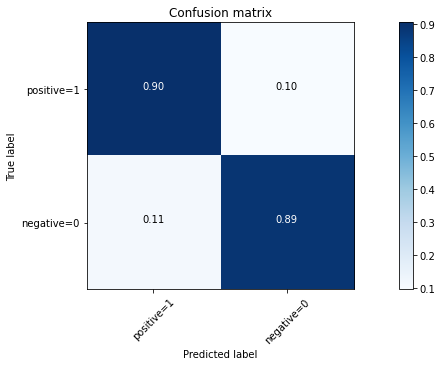

In [20]:
import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= True,  title='Confusion matrix')